<a href="https://colab.research.google.com/github/pythonkvs/seminars/blob/main/comparison_libraries/Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt

<h3>Data reshaping and sampling<h3>

In [ ]:
df = pd.read_csv("breast-cancer-wisconsin.csv", sep=';')
#display(df.head())
#print(len(df))       
        
for i in range(0,len(df)):
    if df.iat[i, 10] == 2:
        df.iat[i, 10] = 0
    else:
        df.iat[i, 10] = 1
        
for i in range(0, len(df)):
    if df.iat[i, 10] != 1 and df.iat[i, 10] != 0:
        print(df.iloc[i, 10])

ytrain = df["Column11"].to_numpy()

df = df.drop(["Column1", "Column7", "Column11"], axis=1)

xtrain = df.to_numpy()

xtrain, ytrain = shuffle(xtrain, ytrain, random_state=0)

feature_train, feature_test, target_train, target_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

<h3> Model building<h3>

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(8)))
model.add(layers.Dense(2, activation='relu', name="layer1"))
model.add(layers.Dense(1, activation='sigmoid', name="layer2"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 18        
                                                                 
 layer2 (Dense)              (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


<h3> Model training<h3>

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=feature_train, y=target_train, validation_split=0.2, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
14/14 - 3s - loss: 1.3006 - accuracy: 0.0559 - val_loss: 1.2959 - val_accuracy: 0.0357 - 3s/epoch - 186ms/step
Epoch 2/1000
14/14 - 0s - loss: 1.2947 - accuracy: 0.0559 - val_loss: 1.2899 - val_accuracy: 0.0357 - 67ms/epoch - 5ms/step
Epoch 3/1000
14/14 - 0s - loss: 1.2888 - accuracy: 0.0559 - val_loss: 1.2840 - val_accuracy: 0.0357 - 64ms/epoch - 5ms/step
Epoch 4/1000
14/14 - 0s - loss: 1.2829 - accuracy: 0.0559 - val_loss: 1.2782 - val_accuracy: 0.0446 - 74ms/epoch - 5ms/step
Epoch 5/1000
14/14 - 0s - loss: 1.2770 - accuracy: 0.0582 - val_loss: 1.2724 - val_accuracy: 0.0536 - 79ms/epoch - 6ms/step
Epoch 6/1000
14/14 - 0s - loss: 1.2712 - accuracy: 0.0582 - val_loss: 1.2666 - val_accuracy: 0.0536 - 73ms/epoch - 5ms/step
Epoch 7/1000
14/14 - 0s - loss: 1.2654 - accuracy: 0.0582 - val_loss: 1.2609 - val_accuracy: 0.0536 - 69ms/epoch - 5ms/step
Epoch 8/1000
14/14 - 0s - loss: 1.2597 - accuracy: 0.0604 - val_loss: 1.2551 - val_accuracy: 0.0625 - 74ms/epoch - 5ms/step
Epoch 9/

<h3> Model evaluation<h3>

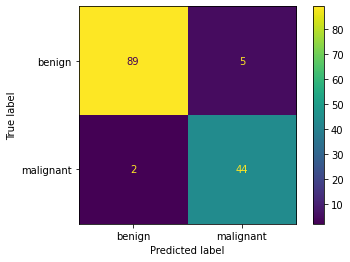

In [ ]:
predictions = model.predict(feature_test)
rounded_predictions = np.round(predictions, 0)
cm = confusion_matrix(target_test, rounded_predictions)
class_names = ["benign", "malignant"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()